<a href="https://colab.research.google.com/github/paridhisonii/APS-Lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

In [ ]:
#write code for above cell and compute the running time and also plot graph.

Unsorted Array: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Array: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

>> elapsed time 0.08816800004751713 ms




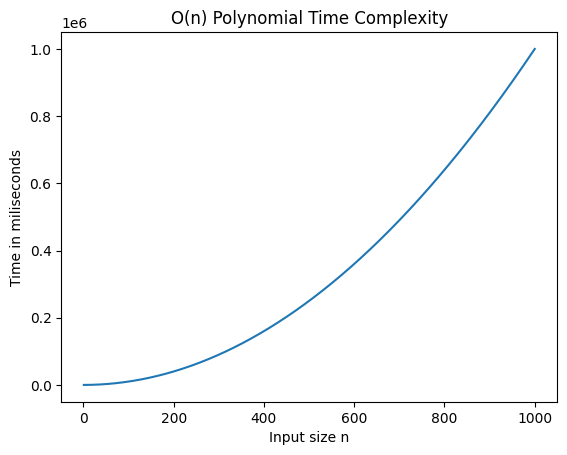

In [9]:
import matplotlib.pyplot as plt
import timeit

def countingsort(arr):
    maxvalue = max(arr)
    n = len(arr)

    cntArry = [0] * (maxvalue + 1)

    for v in arr:
        cntArry[v] += 1

    index = 0
    for i in range(len(cntArry)):
        while cntArry[i] > 0:
            arr[index] = i
            index += 1
            cntArry[i] -= 1

    return arr

arr =  [4,3,2,1,4,3,2,4,3,4]
print(f'Unsorted Array: {arr}\nSorted Array: {countingsort(arr)}\n')
start_time = timeit.default_timer()
countingsort(arr)
print(">> elapsed time", (timeit.default_timer() - start_time)* 1000 , "ms\n\n")

n_values = list(range(1, 1001))
time_values = []

for n in n_values:
    arr = list(range(n))
    countingsort(arr)
    time_values.append(n**2)

plt.figure()
plt.plot(n_values, time_values)
plt.xlabel("Input size n")
plt.ylabel("Time in miliseconds")
plt.title("O(n) Polynomial Time Complexity")
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


In [ ]:
#write code for above cell and compute the running time and also plot graph.

Unsorted Array: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted Array: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

>> elapsed time 0.1462220000121306 ms




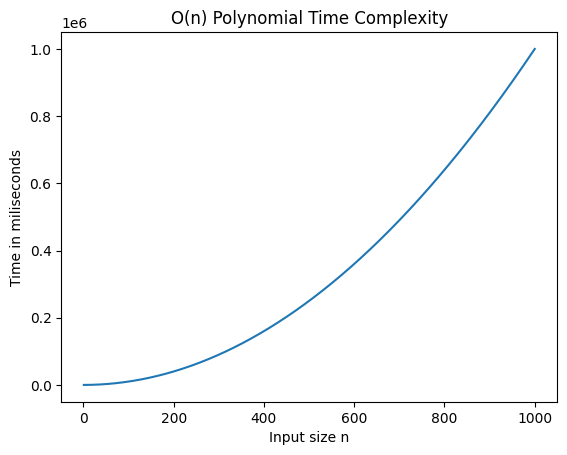

In [7]:
import matplotlib.pyplot as plt
import timeit

def insertion_sort(bucket):
    for i in range(1, len(bucket)):
        key = bucket[i]
        j = i - 1
        while j >= 0 and bucket[j] > key:
            bucket[j + 1] = bucket[j]
            j -= 1
        bucket[j + 1] = key

def bucketsort(arr):
    n = len(arr)
    if n == 0:
        return arr

    # Find min and max to normalize values
    min_val, max_val = min(arr), max(arr)
    buckets = [[] for _ in range(n)]

    # Put array elements in different buckets
    for num in arr:
        # Scale to range [0, n-1]
        bi = int((num - min_val) / (max_val - min_val + 1) * n)
        buckets[bi].append(num)

    # Sort individual buckets using insertion sort
    for bucket in buckets:
        insertion_sort(bucket)

    # Concatenate all buckets into arr[]
    index = 0
    for bucket in buckets:
        for num in bucket:
            arr[index] = num
            index += 1

    return arr


arr =   [8,5,3,1,9,6,0,7,4,2,5]
print(f'Unsorted Array: {arr}\nSorted Array: {bucketsort(arr)}\n')
start_time = timeit.default_timer()
bucketsort(arr)
print(">> elapsed time", (timeit.default_timer() - start_time)* 1000 , "ms\n\n")

n_values = list(range(1, 1001))
time_values = []

for n in n_values:
    arr = list(range(n))
    bucketsort(arr)
    time_values.append(n**2)

plt.figure()
plt.plot(n_values, time_values)
plt.xlabel("Input size n")
plt.ylabel("Time in miliseconds")
plt.title("O(n) Polynomial Time Complexity")
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

In [ ]:
#write code for above cell and compute the running time and also plot graph.

Unsorted Array: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Array: None

>> elapsed time 0.11874400001943286 ms




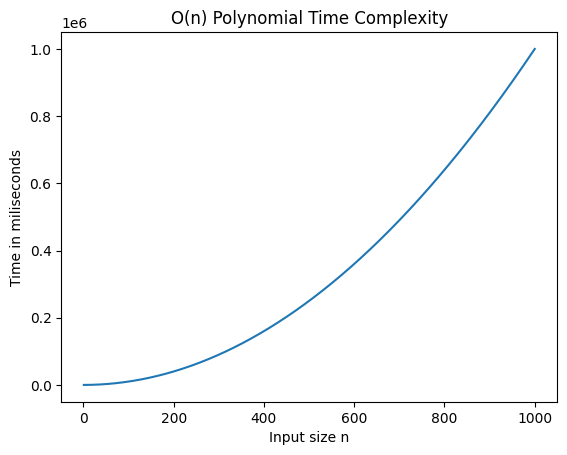

In [8]:
import matplotlib.pyplot as plt
import timeit

def countingSort(arr, exp1):

    n = len(arr)

    # The output array elements that will have sorted arr
    output = [0] * (n)

    # initialize count array as 0
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

# Method to do Radix Sort


def radixsort(arr):

    # Find the maximum number to know number of digits
    max1 = max(arr)

    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

arr = [18,5,100,3,1,19,6,0,7,4,2]
print(f'Unsorted Array: {arr}\nSorted Array: {radixsort(arr)}\n')
start_time = timeit.default_timer()
radixsort(arr)
print(">> elapsed time", (timeit.default_timer() - start_time)* 1000 , "ms\n\n")

n_values = list(range(1, 1001))
time_values = []

for n in n_values:
    arr = list(range(n))
    radixsort(arr)
    time_values.append(n**2)

plt.figure()
plt.plot(n_values, time_values)
plt.xlabel("Input size n")
plt.ylabel("Time in miliseconds")
plt.title("O(n) Polynomial Time Complexity")
plt.show()